In [9]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

def get_file_links(url):
    """ 爬取给定URL的网页，提取所有文件链接 """
    file_links = []
    dir_links = []
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 假设所有文件都是<a>标签链接
    for link in soup.find_all('a'):
        href = link.get('href')
        
        if href and '.' in href:  # 简单的检查来猜测是否为文件
            file_links.append(urljoin(url, href))
        elif href and href.endswith('/'):
            dir_links.append(urljoin(url, href))

    return file_links, dir_links

def download_file(url):
    """ 下载单个文件 """
    response = requests.get(url)
    if response.status_code == 200:
        file_name = url.split('/')[-1]
        with open(file_name, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_name}")
    else:
        print(f"Failed to download {url}")

def get_file_from_dir(url):
    file_links, dir_links = get_file_links(url)
    for dir in dir_links:
        dirname = dir.split('/')[-2]
        os.mkdir(dirname)
    for file_link in file_links:
        os.
        download_file(file_link)
    for dir_link in dir_links:
        get_file_from_dir(dir_link)



# 主程序
base_url = "http://piweb.ooirsn.uw.edu/das/"  # 更改为目标网址
file_links, dir_links = get_file_links(base_url)




In [ ]:
get_file_from_dir(base_url)

In [ ]:
file_links, dir_links =

In [3]:
file_links

['http://piweb.ooirsn.uw.edu/das/AAA-readme.pdf']

In [11]:
dir_links

['http://piweb.ooirsn.uw.edu/das/data/',
 'http://piweb.ooirsn.uw.edu/das/processed/']

In [12]:
for dir in dir_links:
    dirname = dir.split('/')[-2]
    print(dirname)

data
processed


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

def get_file_links(url):
    """ 爬取给定URL的网页，提取所有文件链接 """
    file_links = []
    dir_links = []
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        for link in soup.find_all('a'):
            href = link.get('href')
            
            if href and '.' in href:  # 检查是否为文件
                file_links.append(urljoin(url, href))
            elif href and href.endswith('/'):
                dir_links.append(urljoin(url, href))

    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")

    return file_links, dir_links

def download_file(url, folder_path):
    """ 下载单个文件到指定文件夹 """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            file_name = url.split('/')[-1]
            file_path = os.path.join(folder_path, file_name)
            # with open(file_path, 'wb') as file:
            #     file.write(response.content)
            print(f"Downloaded {file_name} to {folder_path}")
        else:
            print(f"Failed to download {url}")

    except requests.RequestException as e:
        print(f"Error downloading {url}: {e}")

def download_files_from_url(url, folder_path):
    """ 从URL下载文件和目录 """
    file_links, dir_links = get_file_links(url)

    # 创建文件夹（如果不存在）
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # 下载当前目录中的文件
    for file_link in file_links:
        download_file(file_link, folder_path)

    # 递归处理子目录
    for dir_link in dir_links:
        dir_name = dir_link.split('/')[-2]
        new_folder_path = os.path.join(folder_path, dir_name)
        download_files_from_url(dir_link, new_folder_path)

# 主程序
base_url = "http://piweb.ooirsn.uw.edu/das/"  # 更改为目标网址
base_folder_path = "downloaded_files"  # 本地存储的根文件夹
download_files_from_url(base_url, base_folder_path)


In [15]:
import logging
import sys
# 创建日志器logger并将其日志级别设置为DEBUG
logger = logging.getLogger("python_config_logger")
logger.setLevel(logging.DEBUG)
# 创建一个流处理器handler并将其日志级别设置为DEBUG
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
# 创建一个格式化器formatter并将其添加到处理器handler中
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
# 为日志器logger添加上面创建好的处理器handler
logger.addHandler(handler)
# 将日志打印在控制台
logger.debug('打印日志级别：debug')
logger.info('打印日志级别：info')
logger.warning('打印日志级别：warning')
logger.error('打印日志级别：error')
logger.critical('打印日志级别：critical')

2024-01-04 10:12:37,603 - python_config_logger - DEBUG - 打印日志级别：debug
2024-01-04 10:12:37,604 - python_config_logger - INFO - 打印日志级别：info
2024-01-04 10:12:37,605 - python_config_logger - WARNING - 打印日志级别：warning
2024-01-04 10:12:37,605 - python_config_logger - ERROR - 打印日志级别：error
2024-01-04 10:12:37,606 - python_config_logger - CRITICAL - 打印日志级别：critical


In [ ]:
import logging
import sys
# 创建日志器logger并将其日志级别设置为DEBUG
logger = logging.getLogger("python_config_logger")
logger.setLevel(logging.DEBUG)
# 创建一个流处理器handler并将其日志级别设置为DEBUG
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
# 创建一个格式化器formatter并将其添加到处理器handler中
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
# 为日志器logger添加上面创建好的处理器handler
logger.addHandler(handler)
# 将日志打印在控制台
logger.debug('打印日志级别：debug')
logger.info('打印日志级别：info')
logger.warning('打印日志级别：warning')
logger.error('打印日志级别：error')
logger.critical('打印日志级别：critical')

In [17]:
import numpy as np

def get_y(x):
    y = x**3 + 2*x + 1
    return y

x_true = np.linspace(-10, 10, 1000)
x = np.zeros_like(x_true)

y_obs = get_y(x_true)
y_syn = get_y(x)


x_list = []
misfit_list = []

a = 0.01
for i in range(100):
    misfit = np.sum(1/2*(y_obs - y_syn)**2)
    grad = y_obs - y_syn

    x = x + a*grad
    y_syn = get_y(x)

    x_list.append(x)
    misfit_list.append(misfit)




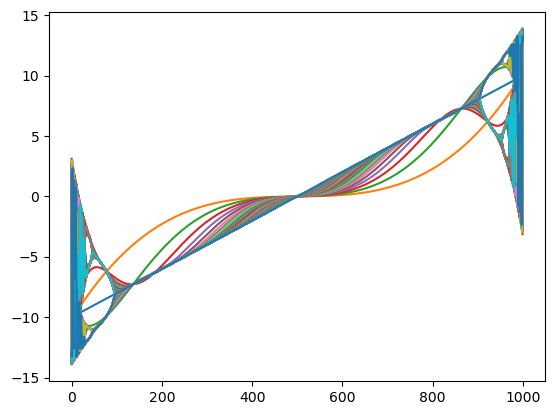

In [18]:
import matplotlib.pyplot as plt

plt.plot(x_true, label='obs')
for x in x_list:
    plt.plot(x, label='syn')
    

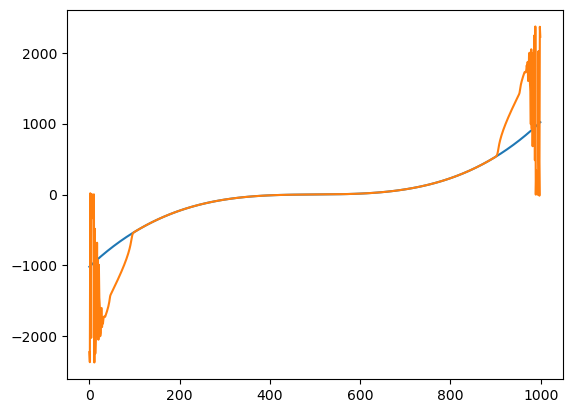

In [19]:
plt.plot(y_obs, label='obs')
plt.plot(y_syn, label='syn')

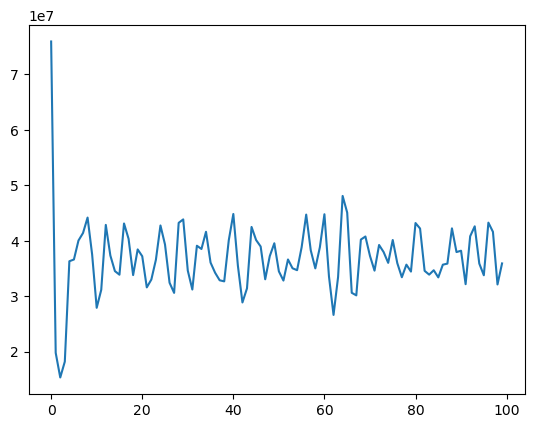

In [20]:
plt.plot(misfit_list)

In [21]:
import numpy as np

def get_y(x):
    y1 = x**3 + 2*x + 1
    y2 = np.sin(x)
    return y1, y2

x_true = np.linspace(-10, 10, 1000)
x = np.zeros_like(x_true)

y_obs1, y_obs2 = get_y(x_true)
y_syn1, y_syn2 = get_y(x)


x_list = []
misfit_list = []

a = 0.01
for i in range(100):
    misfit1 = np.sum(1/2*(y_obs1 - y_syn1)**2 + 1/2*(y_obs2 - y_syn2)**2)
    grad1 = (y_obs1 - y_syn1) + (y_obs2 - y_syn2)

    x = x + a*grad
    y_syn1, y_syn2 = get_y(x)

    x_list.append(x)
    misfit_list.append(misfit)




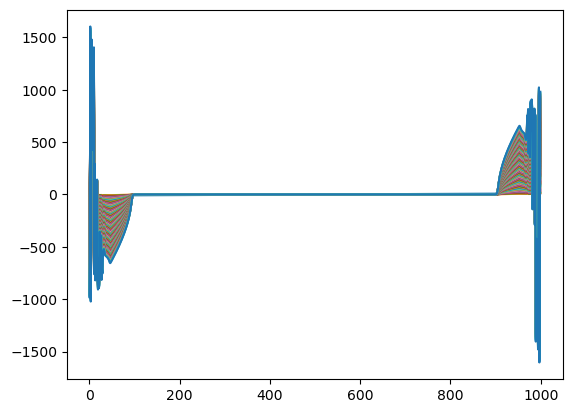

In [22]:
import matplotlib.pyplot as plt

plt.plot(x_true, label='obs')
for x in x_list:
    plt.plot(x, label='syn')
    
    

In [231]:
def get_y(x):
    y1 = np.sin(x)+1
    y2 = np.sin(x+2) - 3*x**2 + 2*x + 1 - np.exp(-x**2/10)
    return y1, y2

# x_true = np.linspace(-10, 10, 100)
x_true = np.random.randn(100) * 10
x_true = signal.savgol_filter(x_true, 53, 3) 
x_init = np.zeros_like(x_true)

y_obs_true1, y_obs_true2 = get_y(x_true)
y_syn1, y_syn2 = get_y(x_init)

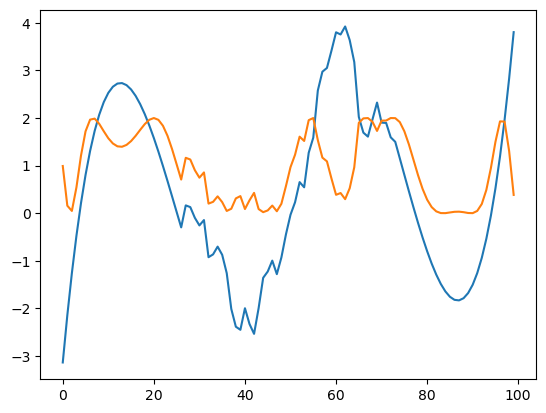

In [232]:
plt.plot(x_true)
plt.plot(y_obs_true1)


In [257]:
import numpy as np
from scipy import signal

def get_y(x):
    y1 = np.exp(-(x+1)**2/10)
    y2 = np.sin(x)+1
    return y1, y2

# x_true = np.linspace(-10, 10, 100)
x_true = np.random.randn(100) 
x_true = signal.savgol_filter(x_true, 53, 3) 
x_init = np.zeros_like(x_true)

y_obs_true1, y_obs_true2 = get_y(x_true)
y_syn1, y_syn2 = get_y(x_init)

x = x_init
a = 0.01
misfit_list = []
grad_list = []
x_list = []
for i in range(1000):
    # calculate misfit
    misfit1 = np.sum(1/2*(y_obs_true1 - y_syn1)**2) 
    misfit2 = np.sum(1/2*(y_obs_true2 - y_syn2)**2)
    misfit = 1/2 * (misfit1 + misfit2)
    misfit_list.append(misfit)
    
    # calculate gradient
    grad1 = (y_obs_true1 - y_syn1) * np.exp(-(x+1)**2/10) * (-2/10) * (x+1)
    grad2 = (y_obs_true2 - y_syn2) * np.cos(x)
    grad = (grad1 + grad2)
    grad_list.append(grad)

    # update model
    x = x + a*grad + a*np.random.rand(grad.size) * grad
    
    # update synthetic data
    y_syn1, y_syn2 = get_y(x)

    x_list.append(x)

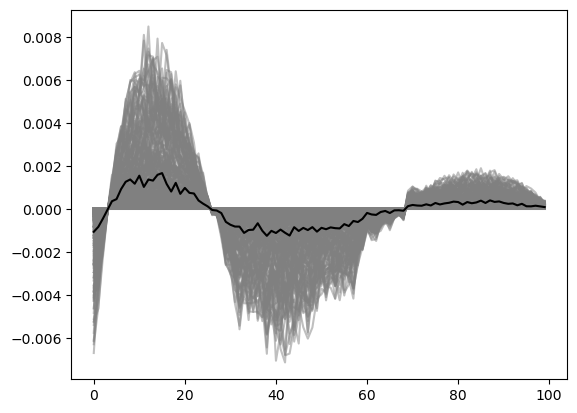

In [261]:
for i in range(999):
    plt.plot(x_list[i+1] - x_list[i], label='syn', color='gray', alpha=0.5)

plt.plot(x_list[100] - x_list[99], label='syn', color='black')

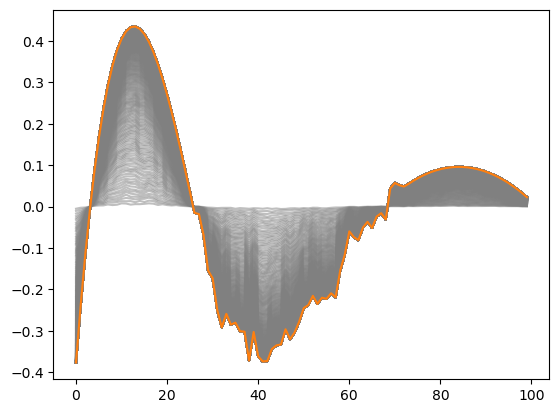

In [262]:
import matplotlib.pyplot as plt

plt.plot(x_true, label='obs')
for x in x_list:
    plt.plot(x, label='syn', color='gray', alpha=0.5)
    
plt.plot(x, label='obs')
    

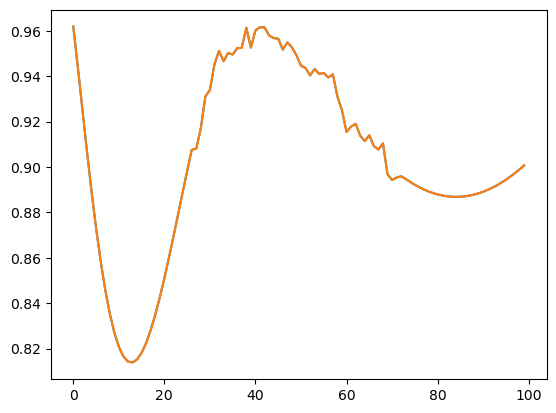

In [260]:
import matplotlib.pyplot as plt

plt.plot(y_obs_true1, label='obs')
# for x in x_list:
#     plt.plot(x, label='syn')
    
plt.plot(y_syn1, label='obs')
    

In [161]:
import numpy as np
from scipy import signal

def get_y(x):
    # y = (np.sum(x+1)**3 + 2*x + 1 ) * np.sin(t)
    y = -np.sin(x) + x 
    return y

x_true = np.random.randn(100)
x_true = signal.savgol_filter(x_true, 53, 3) 
x = np.ones_like(x_true)

y_obs = get_y(x_true)
y_syn = get_y(x)

t = np.linspace(0, 1, 200)

x_list = []
misfit_list = []

a = 0.1
for i in range(1000):
    # grad_syn = np.sum(x+1)**3 + 2*x + 1
    # grad_syn = -np.cos(x) + 1
    grad_syn = 1
    misfit = np.sum(1/2*(y_obs - y_syn)**2)
    grad = (y_obs - y_syn) * grad_syn

    x = x + a*grad
    y_syn = get_y(x)

    x_list.append(x)
    misfit_list.append(misfit)




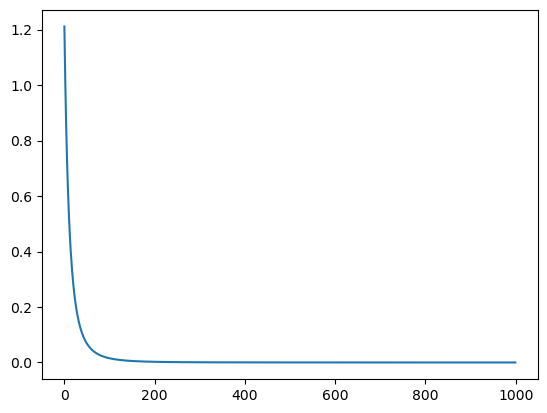

In [162]:
plt.plot(misfit_list)

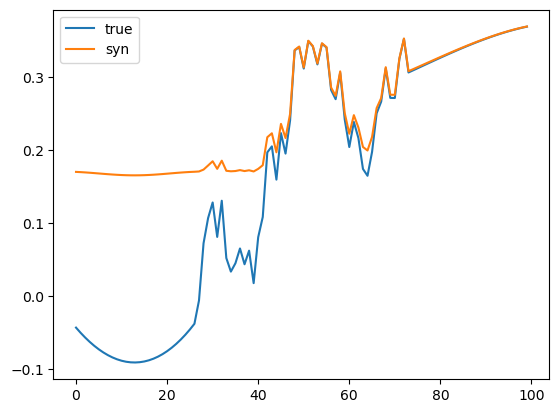

In [163]:
import matplotlib.pyplot as plt

plt.plot(x_true, label='true')
# for x in x_list:
#     plt.plot(x, label='syn')
    
plt.plot(x, label='syn')
plt.legend()

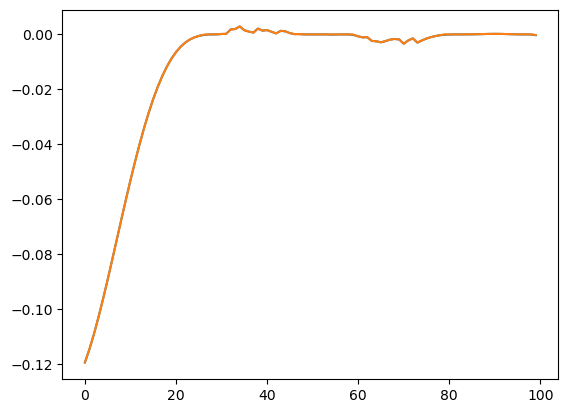

In [157]:
import matplotlib.pyplot as plt

plt.plot(y_obs, label='obs')
# for x in x_list:
#     plt.plot(x, label='syn')
    
plt.plot(y_syn, label='obs')
    